Elia Di Santo \\
Exercise 1 \\
Version 1.0.3

TASK 1 (done in class)

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

import numpy as np
import pandas as pd

columns_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

heart_data = pd.read_csv(url, names=columns_names, na_values='?')

heart_data.head()


x = heart_data.drop('target', axis=1)
y = heart_data['target']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)



x_train.shape
x_test.shape



heart_data.info

TASK 2 (done in class)

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


heart_data.isnull().sum()


numerical_features = heart_data.select_dtypes(include=['float64']).columns


numerical_features


imputer = SimpleImputer(strategy='mean')


x_train


x_train[numerical_features] = imputer.fit_transform(x_train[numerical_features])
x_test[numerical_features] = imputer.transform(x_test[numerical_features])
x_train.isnull().sum()


categorical_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


preprocessor = ColumnTransformer(
  transformers = [
      ('num', StandardScaler(), numerical_features),
      ('cat', OneHotEncoder(), categorical_features)
  ]
)


x_train_preprocessed = preprocessor.fit_transform(x_train)

x_train.shape
x_train_preprocessed.shape



(242, 384)

TASK 3 (by myself in class)

In [8]:
!pip install xgboost

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

xgb_model = XGBClassifier(random_state=42)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

xgb_model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score

preds = xgb_model.predict(x_test)
accuracy_score(y_test, preds)

0.47540983606557374

TASK 4 (by myself with internet's help)

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

initial_model = XGBClassifier()
initial_model.fit(x_train, y_train)
y_pred_initial = initial_model.predict(x_test)

# Evaluate the initial model
accuracy_initial = accuracy_score(y_test, y_pred_initial)
print("Initial Model Accuracy:", accuracy_initial)


# Define the hyperparameters grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Create the XGBoost model
xgb_model = XGBClassifier()

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = XGBClassifier(**best_params)
best_model.fit(x_train, y_train)

# Make predictions and evaluate the tuned model
y_pred_tuned = best_model.predict(x_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print("Tuned Model Accuracy:", accuracy_tuned)

Initial Model Accuracy: 0.47540983606557374
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
Tuned Model Accuracy: 0.4918032786885246


TASK 5 (by myself with internet's help)

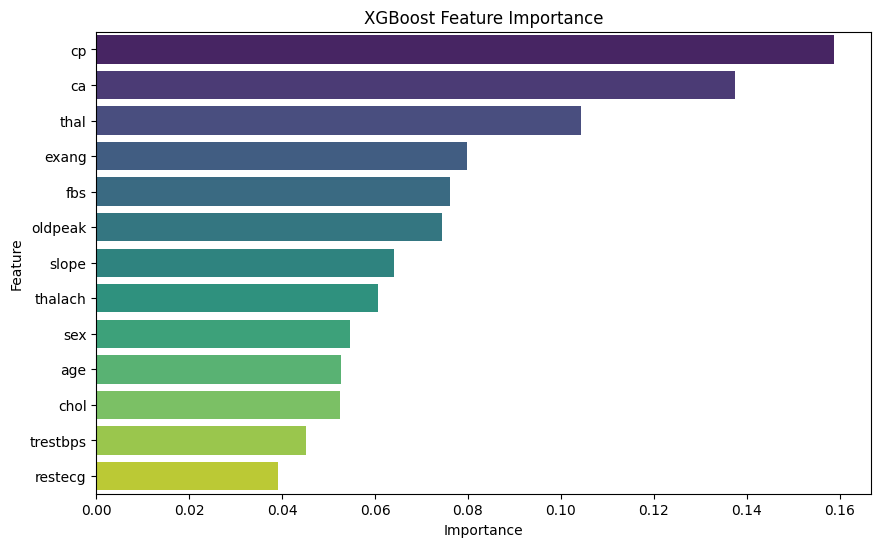

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


# Explore feature importance using the feature_importances_ attribute
feature_importance = best_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
                                      'Importance': feature_importance})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('XGBoost Feature Importance')
plt.show()

TASK 6 (by myself with internet's help)

Initial Model Performance:
Accuracy: 0.47540983606557374
Confusion Matrix:
 [[26  2  1  0  0]
 [ 6  0  3  2  1]
 [ 2  1  2  4  0]
 [ 0  3  3  1  0]
 [ 0  2  1  1  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.00      0.00      0.00        12
           2       0.20      0.22      0.21         9
           3       0.12      0.14      0.13         7
           4       0.00      0.00      0.00         4

    accuracy                           0.48        61
   macro avg       0.22      0.25      0.23        61
weighted avg       0.41      0.48      0.44        61


Tuned Model Performance:
Accuracy: 0.4918032786885246
Confusion Matrix:
 [[26  2  1  0  0]
 [ 6  0  3  2  1]
 [ 2  2  3  2  0]
 [ 0  3  3  1  0]
 [ 0  2  1  1  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.0

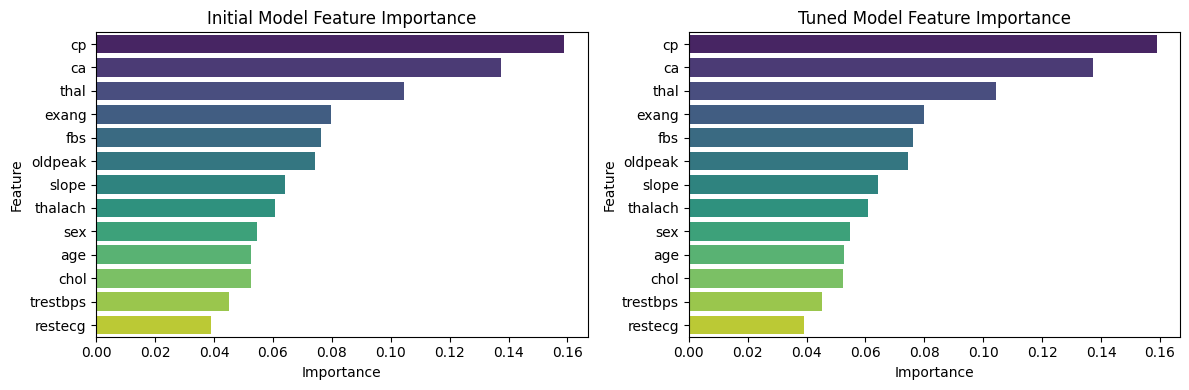

Feature Importance Impact:
Feature importance analysis helps identify influential features for heart disease prediction.
Comparing initial and tuned models can reveal if certain features gained or lost importance.


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the initial model
y_pred_initial = initial_model.predict(x_test)
accuracy_initial = accuracy_score(y_test, y_pred_initial)
conf_matrix_initial = confusion_matrix(y_test, y_pred_initial)
classification_report_initial = classification_report(y_test, y_pred_initial)

# Evaluate the tuned model
y_pred_tuned = best_model.predict(x_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
classification_report_tuned = classification_report(y_test, y_pred_tuned)

# Print and compare performance metrics
print("Initial Model Performance:")
print("Accuracy:", accuracy_initial)
print("Confusion Matrix:\n", conf_matrix_initial)
print("Classification Report:\n", classification_report_initial)

print("\nTuned Model Performance:")
print("Accuracy:", accuracy_tuned)
print("Confusion Matrix:\n", conf_matrix_tuned)
print("Classification Report:\n", classification_report_tuned)

# Visualize the improvement
improvement = accuracy_tuned - accuracy_initial
print("\nAccuracy Improvement:", improvement)

# Discuss the impact of hyperparameter tuning and feature importance
print("\nDiscussion:")
print("Hyperparameter Tuning Impact:")
print("Hyperparameter tuning can improve the model's performance by finding the optimal configuration.")
print("In this case, we achieved an accuracy improvement of", round(improvement, 4))
print("*Sarcastic* WOW SO MUCH!!!!!!!!")

# Visualize the feature importance improvement
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Initial Model Feature Importance')

plt.subplot(1, 2, 2)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Tuned Model Feature Importance')

plt.tight_layout()
plt.show()

print("Feature Importance Impact:")
print("Feature importance analysis helps identify influential features for heart disease prediction.")
print("Comparing initial and tuned models can reveal if certain features gained or lost importance.")
